In [90]:
import pandas as pd 
import numpy as np 
import os
import math
import kaleido
import plotly.express as px 
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn.calibration import CalibratedClassifierCV, CalibrationDisplay
from sklearn.utils import compute_class_weight
from sklearn import metrics
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from config.path_config import ROOT_DIR
import plotly.io as pio
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import KBinsDiscretizer
from IPython.core.interactiveshell import InteractiveShell
from IPython.display import display



InteractiveShell.ast_node_interactivity = "all"



CONFIG_PATH = ""
TARGET = "SeriousDlqin2yrs"
TRAINING_PATH = os.path.join(ROOT_DIR,"data","processed","processed_training_5_exp_tuned.csv")
RAW_DATA_PATH = os.path.join(ROOT_DIR,"data","raw","cs-training.csv")
TEST_DATA_PATH = os.path.join(ROOT_DIR,"data","raw","cs-test.csv")
WRANGLED_DATA = os.path.join(ROOT_DIR,"data","interim","interim_training_forth_exp_tuned.csv")

In [62]:
data = pd.read_csv(RAW_DATA_PATH).drop('Unnamed: 0',axis=1)

In [63]:
#outlier removal 
def outlier_treatment(data,col):
    q1,q3 = np.percentile(data[col] ,[25,75])
    iqr = q3-q1
    lower_range = q1 - (1.5 * iqr)
    upper_range = q3 + (1.5 * iqr)
    lower_range,upper_range
    data = data.drop(data[ (data[col] > upper_range) | (data[col] < lower_range) ].index )
    return data

In [64]:
#outlier removal 
data = outlier_treatment(data,col='MonthlyIncome')
data = outlier_treatment(data,col='RevolvingUtilizationOfUnsecuredLines')
data = outlier_treatment(data,col='DebtRatio')
data = outlier_treatment(data,col='age') 

In [65]:
##Imputation 
data['MonthlyIncome'] = data['MonthlyIncome'].fillna(data['MonthlyIncome'].median())
data['NumberOfDependents'] = data['NumberOfDependents'].fillna(data['NumberOfDependents'].mode()[0])

data['MonthlyIncome'] = np.log1p(data['MonthlyIncome'])
data['DebtRatio'] = np.log1p(data['DebtRatio'])
data['RevolvingUtilizationOfUnsecuredLines'] = np.log1p(data['RevolvingUtilizationOfUnsecuredLines'])

In [66]:
data.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [67]:
## Binnging 

<Figure size 2000x1000 with 0 Axes>

49    3151
48    3077
50    3044
47    3038
46    3022
      ... 
21     142
90     133
91     110
92      63
93      57
Name: age, Length: 73, dtype: int64

<AxesSubplot: xlabel='age', ylabel='count'>

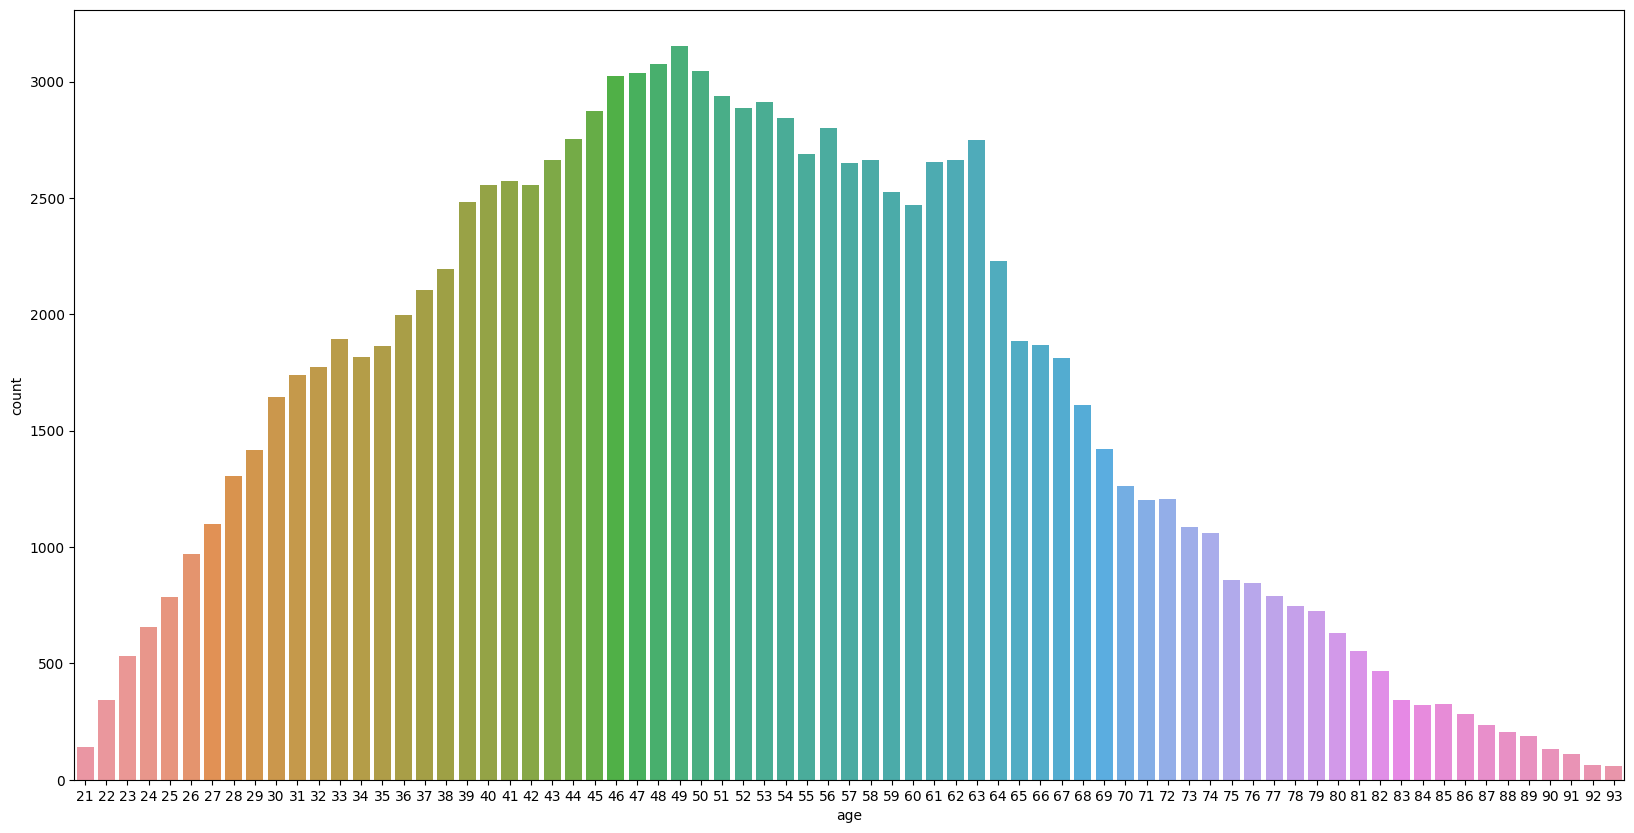

In [68]:
plt.figure(figsize=(20,10))
display(data["age"].value_counts())
sns.countplot(x="age", 
              data=data)

0     98357
1     13100
2      3786
3      1454
4       609
5       272
98      236
6       117
7        45
8        22
9        10
96        5
10        3
12        2
13        1
11        1
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: int64

<AxesSubplot: xlabel='NumberOfTime30-59DaysPastDueNotWorse', ylabel='count'>

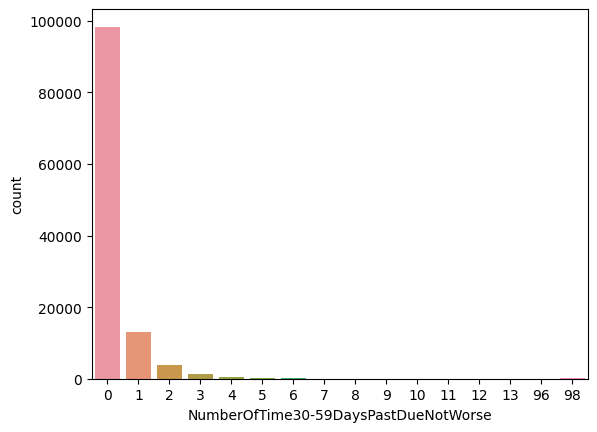

In [69]:
display(data["NumberOfTime30-59DaysPastDueNotWorse"].value_counts())
sns.countplot(x="NumberOfTime30-59DaysPastDueNotWorse", 
              data=data)

0     111929
1       4620
2        851
3        252
98       236
4         79
5         26
6         15
96         5
7          4
8          2
11         1
Name: NumberOfTime60-89DaysPastDueNotWorse, dtype: int64

<AxesSubplot: xlabel='NumberOfTime60-89DaysPastDueNotWorse', ylabel='count'>

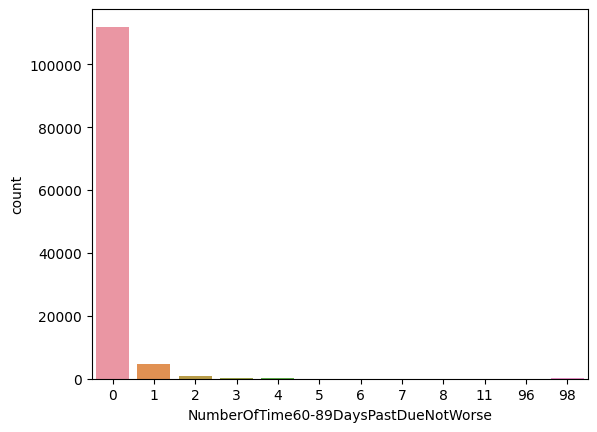

In [70]:
display(data["NumberOfTime60-89DaysPastDueNotWorse"].value_counts())
sns.countplot(x="NumberOfTime60-89DaysPastDueNotWorse", 
              data=data)

In [71]:
def create_aggregation_of_column(data,col_name) : 
    pass

In [72]:
data.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [73]:
pd.set_option('display.max_rows',999)

In [74]:
sample = 

SyntaxError: invalid syntax (3757166603.py, line 1)

In [75]:
def create_rate_of_change(data,col,TARGET=TARGET):
    df = pd.crosstab(data[col],data[TARGET]).reset_index()
    df['all'] = df[0] + df[1]
    df['pct_0'] = df[0]/df['all']
    df['pct_1'] = df[1]/df['all']
    df['diff_1'] = df['pct_1'].diff(1)
    df['diff_0'] = df['pct_0'].diff(1)
    df['0_pct_change'] = df[0].pct_change()*100
    df['1_pct_change'] = df[1].pct_change()*100
    display(df)

In [76]:
data.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [ ]:
create_rate_of_change(data,col='age')

In [ ]:
create_rate_of_change(data,col='NumberOfDependents')

In [ ]:
create_rate_of_change(data,col='NumberOfTimes90DaysLate')

In [ ]:
create_rate_of_change(data,col='NumberOfTime30-59DaysPastDueNotWorse')

In [ ]:
create_rate_of_change(data,col='NumberOfTime60-89DaysPastDueNotWorse')

In [ ]:
create_rate_of_change(data,col='NumberOfOpenCreditLinesAndLoans')
sns.countplot(x="NumberOfOpenCreditLinesAndLoans", 
              data=data)

In [ ]:
create_rate_of_change(data,col='NumberRealEstateLoansOrLines')
sns.countplot(x="NumberRealEstateLoansOrLines", 
              data=data)

In [139]:
age_binning = [-math.inf, 28, 40, 50, 70, math.inf]
dependent_bin = [-math.inf,0,4,6,8,math.inf]
dependent_binning = [0,2,4,5,6,7,8,9,math.inf]
binning_late_90days = [-math.inf,0,2,4,6,8,10,math.inf]
binning_late_3059days = [-math.inf,0,2,4,6,8,10,math.inf]
binning_late_6089days = [-math.inf,0,2,4,6,8,10,math.inf]
interval_revolving_rate = [-math.inf,0.0215, 0.0954, 0.297, 0.708,math.inf]
debt_ratio_interval = [-math.inf,0.0954, 0.226, 0.346, 0.512,math.inf]
monthlyincome_interval = [-math.inf,3198.0, 4755.0, 6400.0, 9150.0,math.inf]
creditlines_interval  = [-math.inf,4.0, 7.0, 9.0, 12.0,math.inf]
realestatelines_interval = [-math.inf,0, 2, 6,math.inf]

def create_binning(data) : 
    data['bin_age'] = pd.cut(data['age'],bins=age_binning).astype('str')
    data['bin_NumberOfDependents'] = pd.cut(data['NumberOfDependents'],bins=dependent_bin).astype('str')
    data['bin_NumberOfTimes90DaysLate'] = pd.cut(data['NumberOfTimes90DaysLate'],bins=binning_late_90days).astype('str')
    data['bin_NumberOfTime30-59DaysPastDueNotWorse'] = pd.cut(data['NumberOfTime30-59DaysPastDueNotWorse'], bins=binning_late_3059days).astype('str')
    data['bin_NumberOfTime60-89DaysPastDueNotWorse'] = pd.cut(data['NumberOfTime60-89DaysPastDueNotWorse'], bins=binning_late_6089days).astype('str')

    data['bin_RevolvingUtilizationOfUnsecuredLines'] = pd.cut(data['RevolvingUtilizationOfUnsecuredLines'],bins=interval_revolving_rate).astype('str')
    data['bin_DebtRatio'] = pd.cut(data['DebtRatio'],bins=debt_ratio_interval).astype('str')
    data['bin_MonthlyIncome'] = pd.cut(data['MonthlyIncome'],bins=monthlyincome_interval).astype('str')
    data['bin_NumberOfOpenCreditLinesAndLoans'] = pd.cut(data['NumberOfOpenCreditLinesAndLoans'],bins=creditlines_interval).astype('str')
    data['bin_NumberRealEstateLoansOrLines'] = pd.cut(data['NumberRealEstateLoansOrLines'],bins=realestatelines_interval).astype('str')
    return data

In [78]:
a = pd.qcut(data['MonthlyIncome'], 5).cat.categories.right
a

Float64Index([3198.0, 4755.0, 6400.0, 9150.0, 3008750.0], dtype='float64')

In [79]:
def calculate_woe(df,features,TARGET):
    df_new = df
    for f in features:
        if f != TARGET : 
            df_woe = df_new.groupby(f).agg({TARGET:['sum','count']})
            df_woe.columns = list(map(''.join, df_woe.columns.values))
            df_woe = df_woe.reset_index()
            df_woe = df_woe.rename(columns = {TARGET+'sum':'bad'})
            df_woe = df_woe.rename(columns = {TARGET+'count':'all'})
            df_woe['good'] = df_woe['all']-df_woe['bad']
            df_woe = df_woe[[f,'good','bad']]
            df_woe['bad_rate'] = df_woe['bad'].mask(df_woe['bad']==0, 1)/df_woe['bad'].sum() # mask 0 to 1 to avoid log(0)
            df_woe['good_rate'] = df_woe['good']/df_woe['good'].sum()

            df_woe['woe'] = np.log(df_woe['bad_rate'].divide(df_woe['good_rate'],fill_value=1))
            df_woe.columns = [c if c==f else c+'_'+f for c in list(df_woe.columns.values)]
            df_new = df_new.merge(df_woe,on=f,how='left')
        else : 
            continue
    return df_new


In [80]:
cols = [x for x in data.columns if x != TARGET]
df_woe = calculate_woe(data,cols,TARGET)

0         1.198226
1         1.198226
2         0.091558
3        -0.776805
4         1.198226
            ...   
118015    0.091558
118016   -1.339107
118017    0.091558
118018   -1.260532
118019    1.198226
Name: woe_bin_RevolvingUtilizationOfUnsecuredLines, Length: 118020, dtype: float64

In [17]:
woe_columns = [x for x in df_woe if x.startswith('woe') or x == TARGET]

In [18]:
woe_bin_columns =  [x for x in df_woe if x.startswith('woe_bin') or x == TARGET]

In [19]:
ready_for_train = df_woe[woe_bin_columns]

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn import metrics
fold = StratifiedKFold(5)
def begin_cross_validation(X,Y,model,fold=fold) : 
    scoring_dict = {'auc':[]}
    for train_idx,test_idx in fold.split(X,Y) : 
        train_x,val_x = X.iloc[train_idx],X.iloc[test_idx]
        train_y,val_y = Y.iloc[train_idx],Y.iloc[test_idx]
        #train model 

        model.fit(train_x,train_y)
        y_pred = model.predict_proba(val_x)
        #calculate metrics 
        scoring_dict["auc"].append(metrics.roc_auc_score(val_y, y_pred[:, 1]))


    #print the scoring 
    print(f'''Scoring: AUC :{np.mean(scoring_dict['auc'])}
     ''')
    return np.mean(scoring_dict['auc'])

In [82]:
def cal_IV(df, feature, target):
    lst = []
    cols=['Variable', 'Value', 'All', 'Bad']
    for i in range(df[feature].nunique()):
        
        val = list(df[feature].unique())[i]
        lst.append([feature, val, df[df[feature] == val].count()[feature], df[(df[feature] == val) & (df[target] == 1)].count()[feature]])
#     print(lst)
    data = pd.DataFrame(lst, columns=cols)
    data = data[data['Bad'] > 0]

    data['Share'] = data['All'] / data['All'].sum()
    data['Bad Rate'] = data['Bad'] / data['All']
    data['Distribution Good'] = (data['All'] - data['Bad']) / (data['All'].sum() - data['Bad'].sum())
    data['Distribution Bad'] = data['Bad'] / data['Bad'].sum()
    data['WoE'] = np.log(data['Distribution Bad'] / data['Distribution Good'])
    data['IV'] = (data['WoE'] * (data['Distribution Bad'] - data['Distribution Good'])).sum()

    data = data.sort_values(by=['Variable', 'Value'], ascending=True)

    return data['IV'].values[0]

In [83]:
bin_cols = ['bin_RevolvingUtilizationOfUnsecuredLines','bin_NumberOfOpenCreditLinesAndLoans','bin_NumberRealEstateLoansOrLines',
            'bin_MonthlyIncome','bin_NumberOfTime30-59DaysPastDueNotWorse','bin_age','bin_NumberOfTimes90DaysLate','bin_NumberOfTime60-89DaysPastDueNotWorse',
           ]
for f in woe_bin_columns:
    print(f)
    print(cal_IV(df_woe,f,'SeriousDlqin2yrs'))

SeriousDlqin2yrs
0.0
woe_bin_age
0.17347909315816645
woe_bin_NumberOfDependents
0.0289687987217556
woe_bin_NumberOfTimes90DaysLate
0.8060436188508985
woe_bin_NumberOfTime30-59DaysPastDueNotWorse
0.6953133409496269
woe_bin_NumberOfTime60-89DaysPastDueNotWorse
0.544489423131595
woe_bin_RevolvingUtilizationOfUnsecuredLines
0.965781189160965
woe_bin_DebtRatio
0.0763046281334447
woe_bin_MonthlyIncome
0.08159746789042399
woe_bin_NumberOfOpenCreditLinesAndLoans
0.0421884318212895
woe_bin_NumberRealEstateLoansOrLines
0.04792215694704778


In [84]:
ready_for_train.isnull().sum()

SeriousDlqin2yrs                                0
woe_bin_age                                     0
woe_bin_NumberOfDependents                      0
woe_bin_NumberOfTimes90DaysLate                 0
woe_bin_NumberOfTime30-59DaysPastDueNotWorse    0
woe_bin_NumberOfTime60-89DaysPastDueNotWorse    0
woe_bin_RevolvingUtilizationOfUnsecuredLines    0
woe_bin_DebtRatio                               0
woe_bin_MonthlyIncome                           0
woe_bin_NumberOfOpenCreditLinesAndLoans         0
woe_bin_NumberRealEstateLoansOrLines            0
dtype: int64

In [85]:
ready_for_train = ready_for_train[woe_bin_columns]

In [86]:
X = ready_for_train.drop([TARGET,'woe_bin_NumberOfOpenCreditLinesAndLoans','woe_bin_NumberRealEstateLoansOrLines'],axis=1)
Y = ready_for_train[TARGET]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
clf_model = LogisticRegression(class_weight='balanced')
begin_cross_validation(X,Y,clf_model)

Scoring: AUC :0.8454567266348795
     


0.8454567266348795

In [88]:
clf_model.fit(X,Y)
y_pred = clf_model.predict_proba(X_test)
y_pred_ = clf_model.predict(X_test)
conf_metrics = metrics.confusion_matrix(y_test,y_pred_)

LogisticRegression(class_weight='balanced')

In [ ]:
tn, fp, fn, tp =conf_metrics.ravel()
import plotly.figure_factory as ff



x = ['0','1']
y =  ['0','1']

# change each element of z to type string for annotations
z_text = [[str(y) for y in x] for x in conf_metrics]

# set up figure 
fig = ff.create_annotated_heatmap(conf_metrics, x=x, y=y, colorscale='tealgrn_r')

# add title
fig.update_layout(title_text='<i><b>Confusion matrix</b></i>',
                  #xaxis = dict(title='x'),
                  #yaxis = dict(title='x')
                 )

# add custom xaxis title
fig.add_annotation(dict(font=dict(color="black",size=14),
                        x=0.5,
                        y=-0.15,
                        showarrow=False,
                        text="Predicted value",
                        xref="paper",
                        yref="paper"))

# add custom yaxis title
fig.add_annotation(dict(font=dict(color="black",size=14),
                        x=-0.35,
                        y=0.5,
                        showarrow=False,
                        text="Real value",
                        textangle=-90,
                        xref="paper",
                        yref="paper"))

# adjust margins to make room for yaxis title
fig.update_layout(margin=dict(t=50, l=200))

# add colorbar
fig['data'][0]['showscale'] = True
fig.show()

In [ ]:
from sklearn.metrics import RocCurveDisplay
x = RocCurveDisplay.from_estimator(
   clf_model, X_test, y_test)
plt.plot([0, 1], [0, 1], "k--", label="ROC curve for chance level (AUC = 0.5)")
plt.show()
plt.savefig("LGBM ROCurve.png")

In [ ]:
from lightgbm import LGBMClassifier
model_lgb = LGBMClassifier()
begin_cross_validation(X,Y,model_lgb)

In [141]:
test_data = pd.read_csv(TEST_DATA_PATH).drop(['Unnamed: 0', 'SeriousDlqin2yrs'],axis=1)

In [142]:
test_data['MonthlyIncome'] = data['MonthlyIncome'].fillna(data['MonthlyIncome'].median())
test_data['NumberOfDependents'] = data['NumberOfDependents'].fillna(data['NumberOfDependents'].mode()[0])

In [143]:
test_data

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.885519,43,0,0.177513,9120.0,4,0,0,0,2.0
1,0.463295,57,0,0.527237,2600.0,15,0,4,0,1.0
2,0.043275,59,0,0.687648,3042.0,12,0,1,0,0.0
3,0.280308,38,1,0.925961,3300.0,7,0,2,0,0.0
4,1.000000,27,0,0.019917,63588.0,4,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...
101498,0.282653,24,0,0.068522,10000.0,5,0,0,0,1.0
101499,0.922156,36,3,0.934217,820.0,8,0,2,0,0.0
101500,0.081596,70,0,836.000000,2700.0,3,0,0,0,2.0
101501,0.335457,56,0,3568.000000,6500.0,8,0,2,1,3.0


In [144]:
test_data = create_binning(data=test_data)

In [ ]:
test_data['woe_bin_RevolvingUtilizationOfUnsecuredLines'] = 

In [103]:
cols = ['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTimes90DaysLate',
 'NumberRealEstateLoansOrLines',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfDependents']

In [117]:
binning_df

,features,range,woe
0,RevolvingUtilizationOfUnsecuredLines,"(0.708, inf]",1.198226
2,RevolvingUtilizationOfUnsecuredLines,"(0.297, 0.708]",0.091558
3,RevolvingUtilizationOfUnsecuredLines,"(0.0954, 0.297]",-0.776805
9,RevolvingUtilizationOfUnsecuredLines,"(-inf, 0.0215]",-1.260532
17,RevolvingUtilizationOfUnsecuredLines,"(0.0215, 0.0954]",-1.339107
0,age,"(40.0, 50.0]",0.195314
1,age,"(28.0, 40.0]",0.379612
5,age,"(70.0, inf]",-1.065767
7,age,"(50.0, 70.0]",-0.296788
15,age,"(-inf, 28.0]",0.578687


In [145]:
#apply 
def find_woe_based_on_binning(x,column,binning_df=binning_df) : 
    filter_binning_df = (binning_df["features"]==column)
    filtered_df  = binning_df.loc[filter_binning_df,:]
    val = filtered_df.loc[filtered_df["range"]==x,'woe'].values.squeeze()
    return val

In [116]:
test_data

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,bin_age,bin_NumberOfDependents,bin_NumberOfTimes90DaysLate,bin_NumberOfTime30-59DaysPastDueNotWorse,bin_NumberOfTime60-89DaysPastDueNotWorse,bin_RevolvingUtilizationOfUnsecuredLines,bin_DebtRatio,bin_MonthlyIncome,bin_NumberOfOpenCreditLinesAndLoans,bin_NumberRealEstateLoansOrLines
0,0.885519,43,0,0.177513,9120.0,4,0,0,0,2.0,"(40.0, 50.0]","(0.0, 4.0]","(-inf, 0.0]","(-inf, 0.0]","(-inf, 0.0]","(0.708, inf]","(0.0954, 0.226]","(6400.0, 9150.0]","(-inf, 4.0]","(-inf, 0.0]"
1,0.463295,57,0,0.527237,2600.0,15,0,4,0,1.0,"(50.0, 70.0]","(0.0, 4.0]","(-inf, 0.0]","(-inf, 0.0]","(-inf, 0.0]","(0.297, 0.708]","(0.512, inf]","(-inf, 3198.0]","(12.0, inf]","(2.0, 6.0]"
2,0.043275,59,0,0.687648,3042.0,12,0,1,0,0.0,"(50.0, 70.0]","(-inf, 0.0]","(-inf, 0.0]","(-inf, 0.0]","(-inf, 0.0]","(0.0215, 0.0954]","(0.512, inf]","(-inf, 3198.0]","(9.0, 12.0]","(0.0, 2.0]"
3,0.280308,38,1,0.925961,3300.0,7,0,2,0,0.0,"(28.0, 40.0]","(-inf, 0.0]","(-inf, 0.0]","(0.0, 2.0]","(-inf, 0.0]","(0.0954, 0.297]","(0.512, inf]","(3198.0, 4755.0]","(4.0, 7.0]","(0.0, 2.0]"
4,1.000000,27,0,0.019917,63588.0,4,0,0,0,0.0,"(-inf, 28.0]","(-inf, 0.0]","(-inf, 0.0]","(-inf, 0.0]","(-inf, 0.0]","(0.708, inf]","(-inf, 0.0954]","(9150.0, inf]","(-inf, 4.0]","(-inf, 0.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101498,0.282653,24,0,0.068522,10000.0,5,0,0,0,1.0,"(-inf, 28.0]","(0.0, 4.0]","(-inf, 0.0]","(-inf, 0.0]","(-inf, 0.0]","(0.0954, 0.297]","(-inf, 0.0954]","(9150.0, inf]","(4.0, 7.0]","(-inf, 0.0]"
101499,0.922156,36,3,0.934217,820.0,8,0,2,0,0.0,"(28.0, 40.0]","(-inf, 0.0]","(-inf, 0.0]","(2.0, 4.0]","(-inf, 0.0]","(0.708, inf]","(0.512, inf]","(-inf, 3198.0]","(7.0, 9.0]","(0.0, 2.0]"
101500,0.081596,70,0,836.000000,2700.0,3,0,0,0,2.0,"(50.0, 70.0]","(0.0, 4.0]","(-inf, 0.0]","(-inf, 0.0]","(-inf, 0.0]","(0.0215, 0.0954]","(0.512, inf]","(-inf, 3198.0]","(-inf, 4.0]","(-inf, 0.0]"
101501,0.335457,56,0,3568.000000,6500.0,8,0,2,1,3.0,"(50.0, 70.0]","(0.0, 4.0]","(-inf, 0.0]","(-inf, 0.0]","(0.0, 2.0]","(0.297, 0.708]","(0.512, inf]","(6400.0, 9150.0]","(7.0, 9.0]","(0.0, 2.0]"


In [148]:
def lookup_binning_woe(data,binning_df=binning_df) : 
    for col in cols : 
        #data cols template 
        data_col_name = f'bin_{col}'
        woe_name = f'woe_{data_col_name}'
        colname = col
        #binning_df        
        print(colname)
        
        data[woe_name] =data[data_col_name].apply(find_woe_based_on_binning,column=colname)
        
    return data

In [149]:
v = lookup_binning_woe(data=test_data)

RevolvingUtilizationOfUnsecuredLines
age
NumberOfTime30-59DaysPastDueNotWorse
DebtRatio
MonthlyIncome
NumberOfOpenCreditLinesAndLoans
NumberOfTimes90DaysLate
NumberRealEstateLoansOrLines
NumberOfTime60-89DaysPastDueNotWorse
NumberOfDependents


In [137]:
binning_df['range'] = binning_df['range'].astype('str')

In [154]:
v.columns

Index(['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'bin_age', 'bin_NumberOfDependents',
       'bin_NumberOfTimes90DaysLate',
       'bin_NumberOfTime30-59DaysPastDueNotWorse',
       'bin_NumberOfTime60-89DaysPastDueNotWorse',
       'bin_RevolvingUtilizationOfUnsecuredLines', 'bin_DebtRatio',
       'bin_MonthlyIncome', 'bin_NumberOfOpenCreditLinesAndLoans',
       'bin_NumberRealEstateLoansOrLines',
       'woe_bin_RevolvingUtilizationOfUnsecuredLines', 'woe_bin_age',
       'woe_bin_NumberOfTime30-59DaysPastDueNotWorse', 'woe_bin_DebtRatio',
       'woe_bin_MonthlyIncome', 'woe_bin_NumberOfOpenCreditLinesAndLoans',
       'woe_bin_NumberOfTimes90DaysLate',
       'woe_bin_NumberRealEstateLoansOrLines',
       'woe_bin_NumberOfTim

In [160]:
required_column = ['woe_bin_age', 'woe_bin_NumberOfDependents',
       'woe_bin_NumberOfTimes90DaysLate',
       'woe_bin_NumberOfTime30-59DaysPastDueNotWorse',
       'woe_bin_NumberOfTime60-89DaysPastDueNotWorse',
       'woe_bin_RevolvingUtilizationOfUnsecuredLines',
       'woe_bin_DebtRatio', 'woe_bin_MonthlyIncome']
ready_for_inference =v[required_column] 

In [169]:
ready_for_inference.columns

Index(['woe_bin_age', 'woe_bin_NumberOfDependents',
       'woe_bin_NumberOfTimes90DaysLate',
       'woe_bin_NumberOfTime30-59DaysPastDueNotWorse',
       'woe_bin_NumberOfTime60-89DaysPastDueNotWorse',
       'woe_bin_RevolvingUtilizationOfUnsecuredLines', 'woe_bin_DebtRatio',
       'woe_bin_MonthlyIncome'],
      dtype='object')

In [171]:
print(f"unique val {ready_for_inference['woe_bin_age'].unique()}")
    

unique val [ 0.19531448 -0.29678839  0.37961239  0.57868675 -1.06576693]


In [175]:
for col in ready_for_inference.columns : 
    ready_for_inference[col].replace('inf',99999,inplace=True)
    ready_for_inference[col].replace('-inf',-99999,inplace=True)

/tmp/ipykernel_1268/75039789.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ready_for_inference[col].replace('inf',99999,inplace=True)
/tmp/ipykernel_1268/75039789.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ready_for_inference[col].replace('-inf',-99999,inplace=True)
/home/fakhri/pacmann_project/project_env/lib/python3.8/site-packages/pandas/core/missing.py:95: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  new_mask = arr == x


In [188]:
ready_for_inference.woe_bin_MonthlyIncome.value_counts()

KeyboardInterrupt: 

In [179]:
print(f"unique val {ready_for_inference['woe_bin_NumberOfDependents'].value_counts()}")
    

KeyboardInterrupt: 

In [177]:
proba_test = clf_model.predict_proba(ready_for_inference)

ValueError: setting an array element with a sequence.

In [138]:
binning_df.dtypes

features     object
range        object
woe         float64
dtype: object

In [35]:
cols = ['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTimes90DaysLate',
 'NumberRealEstateLoansOrLines',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfDependents']

In [100]:
#

,features,range,woe
0,RevolvingUtilizationOfUnsecuredLines,"(0.708, inf]",1.198226
2,RevolvingUtilizationOfUnsecuredLines,"(0.297, 0.708]",0.091558
3,RevolvingUtilizationOfUnsecuredLines,"(0.0954, 0.297]",-0.776805
9,RevolvingUtilizationOfUnsecuredLines,"(-inf, 0.0215]",-1.260532
17,RevolvingUtilizationOfUnsecuredLines,"(0.0215, 0.0954]",-1.339107
0,age,"(40.0, 50.0]",0.195314
1,age,"(28.0, 40.0]",0.379612
5,age,"(70.0, inf]",-1.065767
7,age,"(50.0, 70.0]",-0.296788
15,age,"(-inf, 28.0]",0.578687


In [53]:

def make_binning_woe(df_woe) : 
    df_bin_to_woe = pd.DataFrame(columns = ['features','range','woe'])
    for f in cols:
        b = 'bin_'+f
        w = 'woe_bin_'+f
        df = df_woe[[w,b]].drop_duplicates()
        df.columns = ['woe','range']
        df['features'] = f
        df=df[['features','range','woe']]
        df_bin_to_woe = pd.concat([df_bin_to_woe,df])
        df['score'] = '
    return df_bin_to_woe

df_bin_to_woe

,features,range,woe


In [59]:
binning_df = make_binning_woe(df_woe=df_woe)

In [60]:
binning_df

,features,range,woe
0,RevolvingUtilizationOfUnsecuredLines,"(0.708, inf]",1.198226
2,RevolvingUtilizationOfUnsecuredLines,"(0.297, 0.708]",0.091558
3,RevolvingUtilizationOfUnsecuredLines,"(0.0954, 0.297]",-0.776805
9,RevolvingUtilizationOfUnsecuredLines,"(-inf, 0.0215]",-1.260532
17,RevolvingUtilizationOfUnsecuredLines,"(0.0215, 0.0954]",-1.339107
0,age,"(40.0, 50.0]",0.195314
1,age,"(28.0, 40.0]",0.379612
5,age,"(70.0, inf]",-1.065767
7,age,"(50.0, 70.0]",-0.296788
15,age,"(-inf, 28.0]",0.578687


In [46]:
def generate_scorecard(model_coef,binning_df,features,factor):
    lst = []
    cols = ['Variable','Binning','Score']
    coef = model_coef[0]
    for i in range(len(features)):
        f = features[i]
        df = binning_df[binning_df['features']==f]
        for index,row in df.iterrows():
            print(-coef[i])
            lst.append([f,row['bin'],int(round(-coef[i]*row['woe']*factor))])
    data = pd.DataFrame(lst, columns=cols)
    return data
    

In [ ]:
def make_scorecard(model_coef,binning_df,features,factor) :
    container = []
    

In [42]:
feature_cols = ['RevolvingUtilizationOfUnsecuredLines','NumberOfTime30-59DaysPastDueNotWorse','age','NumberOfTimes90DaysLate',
                'NumberOfTime60-89DaysPastDueNotWorse','MonthlyIncome','DebtRatio']

In [99]:
test_data

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,bin_age,bin_NumberOfDependents,bin_NumberOfTimes90DaysLate,bin_NumberOfTime30-59DaysPastDueNotWorse,bin_NumberOfTime60-89DaysPastDueNotWorse,bin_RevolvingUtilizationOfUnsecuredLines,bin_DebtRatio,bin_MonthlyIncome,bin_NumberOfOpenCreditLinesAndLoans,bin_NumberRealEstateLoansOrLines
0,0.885519,43,0,0.177513,9120.0,4,0,0,0,2.0,"(40.0, 50.0]","(0.0, 4.0]","(-inf, 0.0]","(-inf, 0.0]","(-inf, 0.0]","(0.708, inf]","(0.0954, 0.226]","(6400.0, 9150.0]","(-inf, 4.0]","(-inf, 0.0]"
1,0.463295,57,0,0.527237,2600.0,15,0,4,0,1.0,"(50.0, 70.0]","(0.0, 4.0]","(-inf, 0.0]","(-inf, 0.0]","(-inf, 0.0]","(0.297, 0.708]","(0.512, inf]","(-inf, 3198.0]","(12.0, inf]","(2.0, 6.0]"
2,0.043275,59,0,0.687648,3042.0,12,0,1,0,0.0,"(50.0, 70.0]","(-inf, 0.0]","(-inf, 0.0]","(-inf, 0.0]","(-inf, 0.0]","(0.0215, 0.0954]","(0.512, inf]","(-inf, 3198.0]","(9.0, 12.0]","(0.0, 2.0]"
3,0.280308,38,1,0.925961,3300.0,7,0,2,0,0.0,"(28.0, 40.0]","(-inf, 0.0]","(-inf, 0.0]","(0.0, 2.0]","(-inf, 0.0]","(0.0954, 0.297]","(0.512, inf]","(3198.0, 4755.0]","(4.0, 7.0]","(0.0, 2.0]"
4,1.000000,27,0,0.019917,63588.0,4,0,0,0,0.0,"(-inf, 28.0]","(-inf, 0.0]","(-inf, 0.0]","(-inf, 0.0]","(-inf, 0.0]","(0.708, inf]","(-inf, 0.0954]","(9150.0, inf]","(-inf, 4.0]","(-inf, 0.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101498,0.282653,24,0,0.068522,10000.0,5,0,0,0,1.0,"(-inf, 28.0]","(0.0, 4.0]","(-inf, 0.0]","(-inf, 0.0]","(-inf, 0.0]","(0.0954, 0.297]","(-inf, 0.0954]","(9150.0, inf]","(4.0, 7.0]","(-inf, 0.0]"
101499,0.922156,36,3,0.934217,820.0,8,0,2,0,0.0,"(28.0, 40.0]","(-inf, 0.0]","(-inf, 0.0]","(2.0, 4.0]","(-inf, 0.0]","(0.708, inf]","(0.512, inf]","(-inf, 3198.0]","(7.0, 9.0]","(0.0, 2.0]"
101500,0.081596,70,0,836.000000,2700.0,3,0,0,0,2.0,"(50.0, 70.0]","(0.0, 4.0]","(-inf, 0.0]","(-inf, 0.0]","(-inf, 0.0]","(0.0215, 0.0954]","(0.512, inf]","(-inf, 3198.0]","(-inf, 4.0]","(-inf, 0.0]"
101501,0.335457,56,0,3568.000000,6500.0,8,0,2,1,3.0,"(50.0, 70.0]","(0.0, 4.0]","(-inf, 0.0]","(-inf, 0.0]","(0.0, 2.0]","(0.297, 0.708]","(0.512, inf]","(6400.0, 9150.0]","(7.0, 9.0]","(0.0, 2.0]"


In [44]:
offset =600
factor =48.7 #‘Points to double the odds’ (pdo = 20) / ln(2) 

In [55]:
import joblib
joblib.dump(df_bin_to_woe,"df_bin_to_woe.joblib")

['df_bin_to_woe.joblib']

In [56]:
joblib.load("df_bin_to_woe.joblib")

,features,range,woe


In [57]:
score_card = generate_scorecard(clf_model.coef_,df_bin_to_woe,feature_cols,factor)
score_card

,Variable,Binning,Score


In [ ]:
sort_scorecard = score_card.groupby('Variable').apply(lambda x: x.sort_values('Score', ascending=False))
sort_scorecard

In [ ]:
def str_to_int(s):
    if s == '-inf':
        return -999999999.0
    elif s=='inf':
        return 999999999.0
    else:
        return float(s)
    
def map_value_to_bin(feature_value,feature_to_bin):
    for idx, row in feature_to_bin.iterrows():
        bins = str(row['Binning'])
        left_open = bins[0]=="("
        right_open = bins[-1]==")"
        binnings = bins[1:-1].split(',')
        in_range = True
        # check left bound
        if left_open:
            if feature_value<= str_to_int(binnings[0]):
                in_range = False   
        else:
            if feature_value< str_to_int(binnings[0]):
                in_range = False   
        #check right bound
        if right_open:
            if feature_value>= str_to_int(binnings[1]):
                in_range = False 
        else:
            if feature_value> str_to_int(binnings[1]):
                in_range = False   
        if in_range:
            return row['Binning']
    return null

def map_to_score(df,score_card):
    scored_columns = list(score_card['Variable'].unique())
    score = 0
    for col in scored_columns:
        feature_to_bin = score_card[score_card['Variable']==col]
        feature_value = df[col]
        selected_bin = map_value_to_bin(feature_value,feature_to_bin)
        selected_record_in_scorecard = feature_to_bin[feature_to_bin['Binning'] == selected_bin]
        score += selected_record_in_scorecard['Score'].iloc[0]
    return score  

def calculate_score_with_card(df,score_card,A):
    df['score'] = df.apply(map_to_score,args=(score_card,),axis=1)
    df['score'] = df['score']+A
    df['score'] = df['score'].astype(int)
    return df
        

In [ ]:
good_sample =data[data['SeriousDlqin2yrs']==0].sample(5, random_state=1)
good_sample = good_sample[feature_cols]
bad_sample = data[data['SeriousDlqin2yrs']==1].sample(5, random_state=1)
bad_sample = bad_sample[feature_cols]

In [ ]:
calculate_score_with_card(bad_sample,score_card
                          ,A)

In [ ]:
calculate_score_with_card(t,score_card
                          ,A)